<a href="https://colab.research.google.com/github/ffpaiki/ML-Course-2023/blob/main/HW2.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [ ]:
def generateDataA1Q1(N,title):
    np.random.seed(0)  # For reproducibility
    # colors = 'bm'; markers = 'o+';
    class_priors = [0.6, 0.4]
    labels = (np.random.rand(N) >= class_priors[0]).astype(int)
    x = np.zeros((2, N))

    for l in range(2):
        indl = np.where(labels == l)[0]
        if l == 0:
            N0 = len(indl)
            w0 = np.array([0.5, 0.5])
            mu0 = np.array([[5, 0], [0, 4]])
            Sigma0 = [np.array([[4, 0], [0, 2]]), np.array([[1, 0], [0, 3]])]

            priors = w0
            mean_vectors = mu0
            cov_matrices = Sigma0
            plt.title(title)
            x[:, indl], _ = generate_data_from_gmm(N0, priors, mean_vectors, cov_matrices)

            plt.plot(x[0, indl], x[1, indl], 'mo')

        elif l == 1:
            m1 = np.array([3, 2])
            C1 = np.array([[2, 0], [0, 2]])
            N1 = len(indl)
            x[:, indl] = np.random.multivariate_normal(m1, C1, N1).T
            plt.plot(x[0, indl], x[1, indl], 'b+')
            plt.axis('equal')

    plt.show()

    return x, labels

(2, 3250)
(2, 3250)
(2, 3500)
[0 0 0 ... 0 0 1]


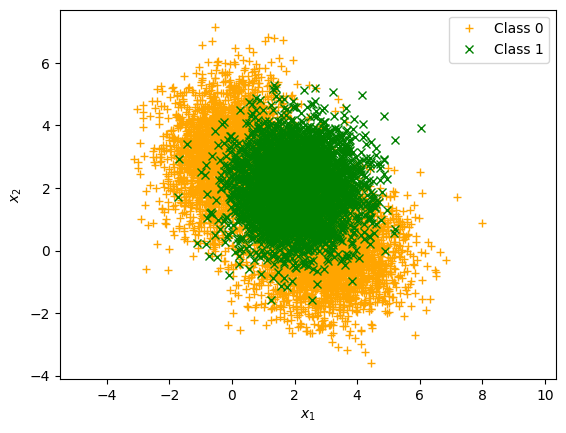

In [ ]:
import numpy as np
import matplotlib.pyplot as plt
import pandas as pd

from sklearn.discriminant_analysis import LinearDiscriminantAnalysis, QuadraticDiscriminantAnalysis
from sklearn.metrics import confusion_matrix, classification_report, precision_score, roc_curve, auc

N = 10000
p0 = 0.65
p1 = 0.35
w1 = 0.5
w2 = 0.5

N01 = int(N * w1 * p0)
N02 = int(N * w2 * p0)
N1 = int(N * p1)


m01 = np.array([3,0])
m02 = np.array([0,3])
C01 = np.array([[2,0],[0,1]])
C02 = np.array([[1,0],[0,2]])

m1 = np.array([2,2])
C1 = np.array([[1,0],[0,1]])

L01 = np.linalg.cholesky(C01)
L02 = np.linalg.cholesky(C02)

data01 = np.random.multivariate_normal(m01, L01, N01).T
data02 = np.random.multivariate_normal(m02, L02, N02).T
data1 = np.random.multivariate_normal(m1, C1, N1).T

data0 = np.hstack((data01,data02))

labels = np.random.choice([0, 1], size=N, p=[0.65, 0.35])  # Random labels for this example

x01, y01 = data01
x02, y02 = data02

x1, y1 = data1

print(data01.shape)
print(data02.shape)
print(data1.shape)
print(labels)

# THIS PART IS DONE AND TEMPORARILY HIDDEN
plt.plot(x01, y01, '+',color='orange')
plt.plot(x02, y02, '+',color='orange', label="Class 0")
plt.plot(x1, y1, 'x', color='green', label = "Class 1")
plt.axis('equal')
plt.xlabel("$x_{1}$")
plt.ylabel("$x_{2}$")
plt.legend()
plt.show()